In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv("/content/netflix_titles.csv")

# Quick overview
print(df.shape)
print(df.info())
df.head()


(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [17]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert date
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year & month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Fill missing values
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")
df['duration'] = df['duration'].fillna("Unknown")

/tmp/ipython-input-1197896869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="Set2")


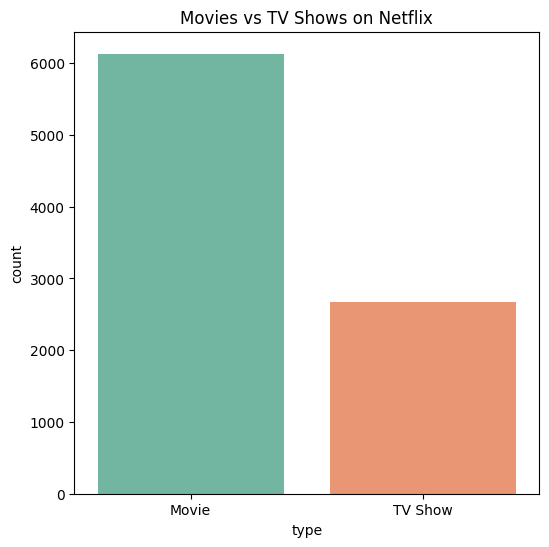

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x="type", palette="Set2")
plt.title("Movies vs TV Shows on Netflix")
plt.show()


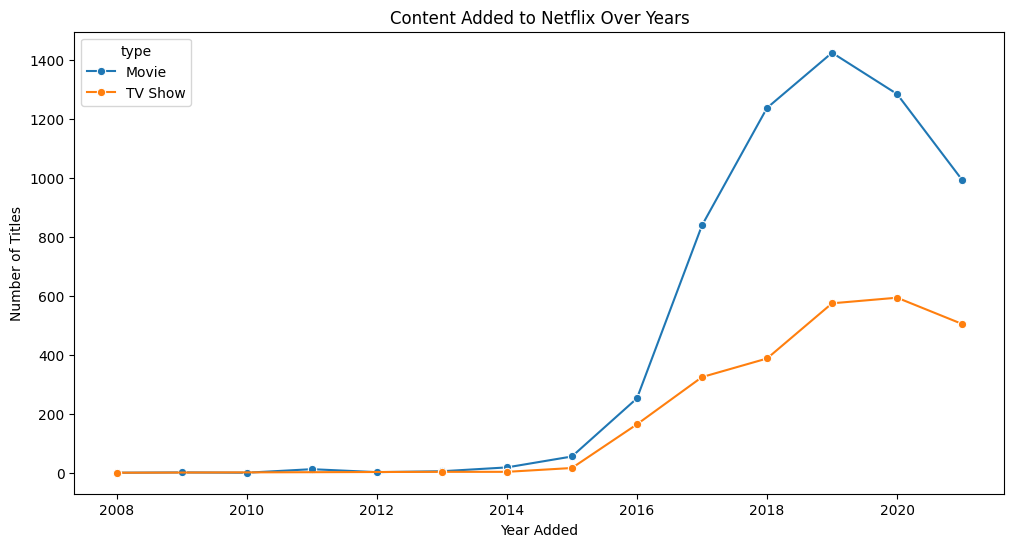

In [19]:
content_trend = df.groupby(['year_added','type']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=content_trend, x='year_added', y='count', hue='type', marker="o")
plt.title("Content Added to Netflix Over Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


/tmp/ipython-input-3407798834.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis")


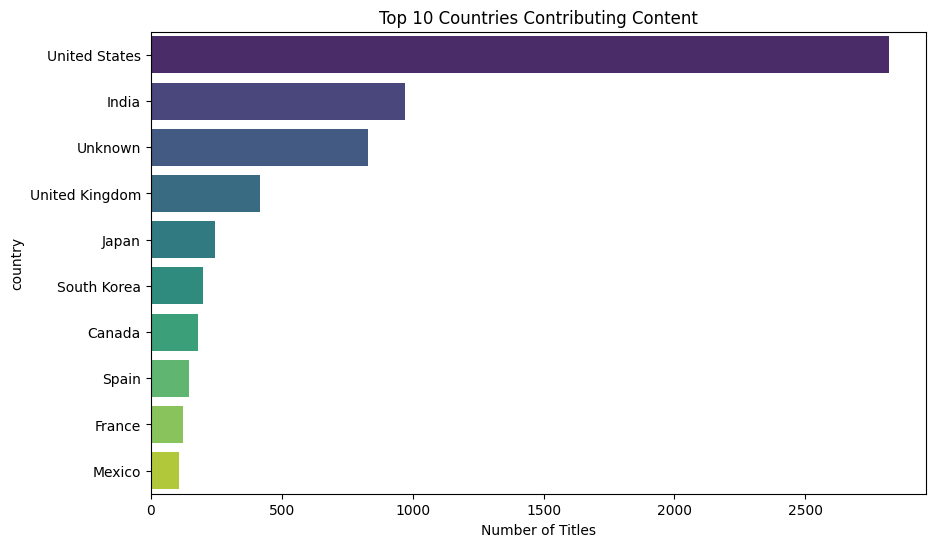

In [20]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis")
plt.title("Top 10 Countries Contributing Content")
plt.xlabel("Number of Titles")
plt.show()



/tmp/ipython-input-1491577032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="rating", order=df['rating'].value_counts().index, palette="coolwarm")


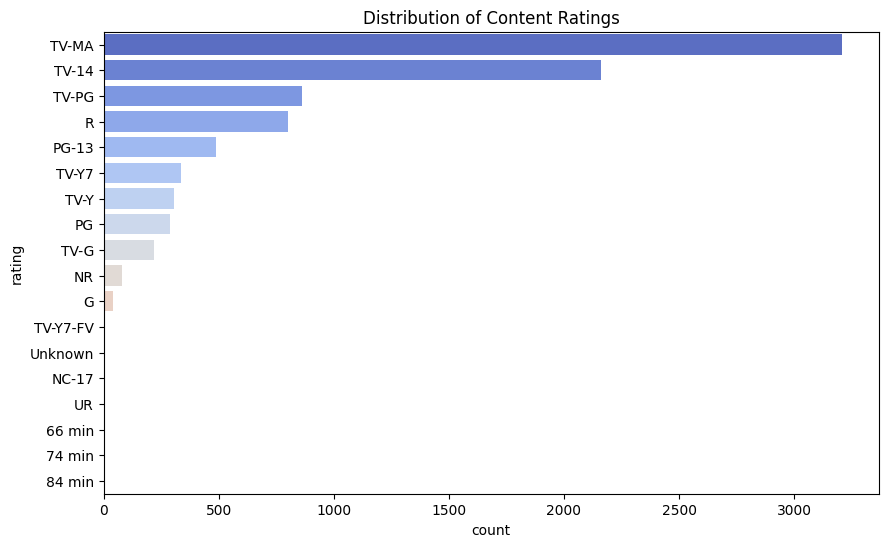

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="rating", order=df['rating'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Content Ratings")
plt.show()


/tmp/ipython-input-328089866.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette="magma")


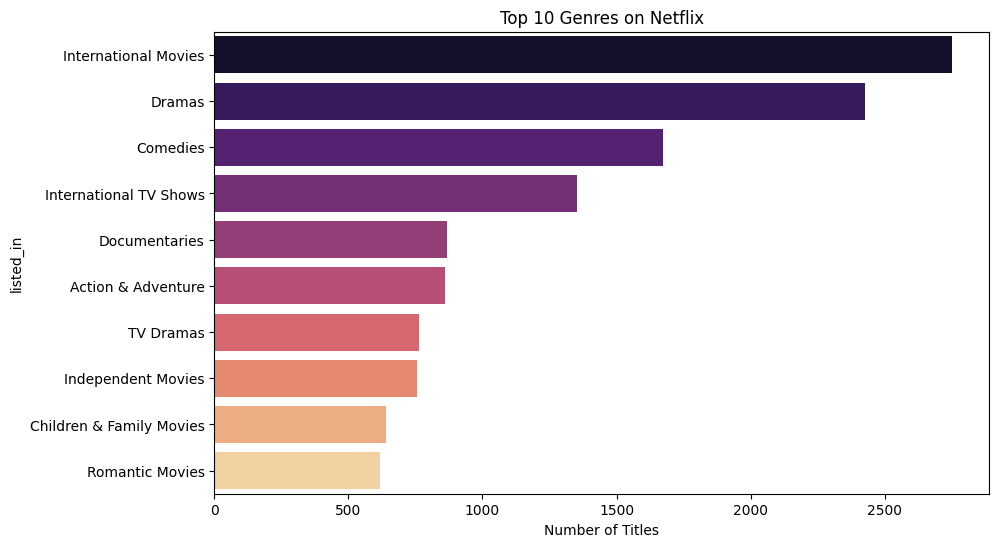

In [22]:
genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette="magma")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.show()


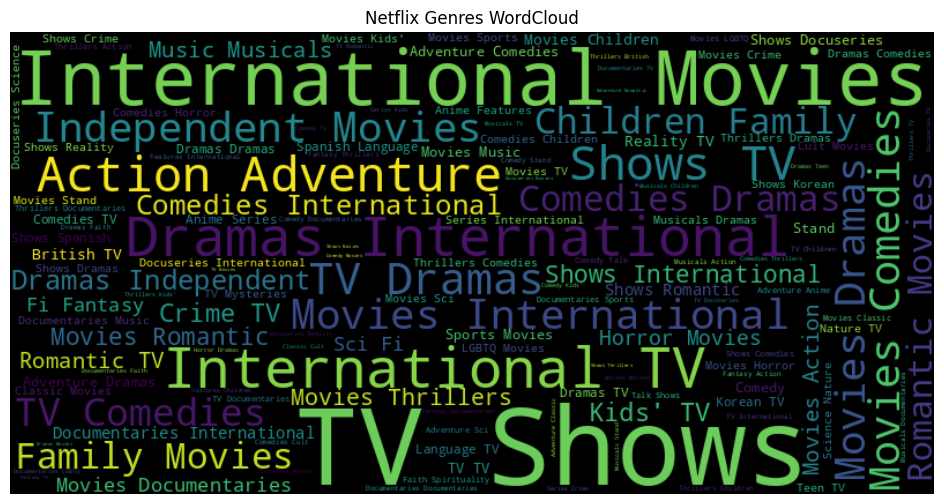

In [23]:
genre_text = " ".join(genres.dropna())
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(genre_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Netflix Genres WordCloud")
plt.show()



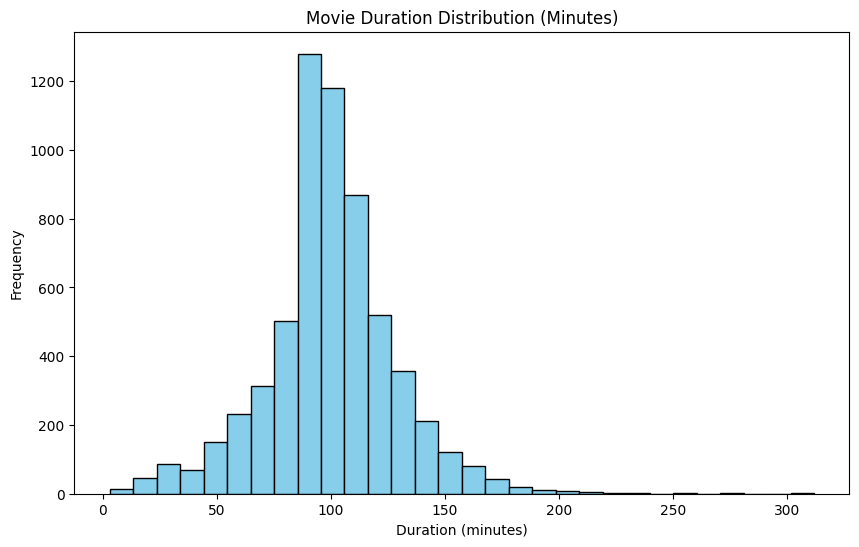

/tmp/ipython-input-105949462.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=tv_show_seasons.index, x=tv_show_seasons.values, palette="Set3")


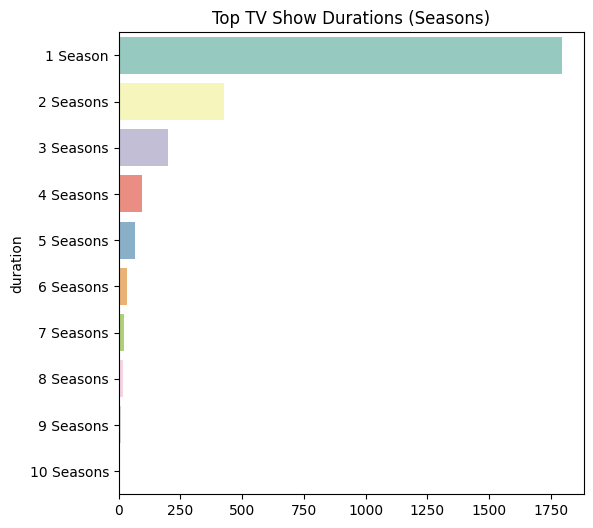

In [25]:
# Movies
movies = df[df['type']=="Movie"]
plt.figure(figsize=(10,6))
# Filter out 'Unknown' duration before converting to float
movies[movies['duration'] != 'Unknown']['duration'].str.replace(" min","").dropna().astype(float).plot(kind="hist", bins=30, color="skyblue", edgecolor="black")
plt.title("Movie Duration Distribution (Minutes)")
plt.xlabel("Duration (minutes)")
plt.show()

# TV Shows
tv_shows = df[df['type']=="TV Show"]
plt.figure(figsize=(6,6))
tv_show_seasons = tv_shows['duration'].value_counts().head(10)
sns.barplot(y=tv_show_seasons.index, x=tv_show_seasons.values, palette="Set3")
plt.title("Top TV Show Durations (Seasons)")
plt.show()